**Abstract:** This iPython notebook contains results from the application of the Haar wavelet transform to the stock market. More specifically, this notebook investigates the relationship between the volatility of the time series of SPY (SPDR ETF for the S&P500, used generally as an indication of the overall state of the markets) and the time series itself of ^VIX (this is an index that tracks the implied volatility of all of the options traded on the CBOE). It has been found that applying a Haar transform to the time series of SPY and using the detail vector can give a closer correlation to ^VIX.

The first thing we must do is import our necessary packages for manipulating time series.

In [2]:
from alpha_vantage.timeseries import TimeSeries
import pandas
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate

The next thing that we must do is configure the Alpha Vantage API to use my specific API Key.

In [3]:
ts = TimeSeries(key='V0MIN5N4S35ZE668', output_format='pandas')

This next function gives us a way to get a time series of the close values of a certain ticker.

In [4]:
def getDailyCloseArray(ticker):
    data, metadata = ts.get_daily(ticker)
    return data['4. close']

This next function will take in a time series and return the trend vector and detail vector that result from the Haar Wavelet Transform. This is the "bread and butter" of the data analysis tools used in this notebook.

In [5]:
def HaarWaveletTransform(timeseries):
    m = list(range(int(len(timeseries)/2)))
    T = [(timeseries[2*i] + timeseries[2*i + 1])/2 for i in m]
    D = [(timeseries[2*i] - timeseries[2*i + 1])/2 for i in m]
    return T, D

Now, let's use the API to get time series' of tickers that we want to investigate, namely SPY and VIX.

In [7]:
spy_daily = getDailyCloseArray("SPY")
vix_daily = getDailyCloseArray("^VIX")

Here is a plot of the two. The blue is the graph of SPY and the orange is the graph of VIX.

Text(0.5, 1.0, '$SPY and ^VIX over the past 100 days')

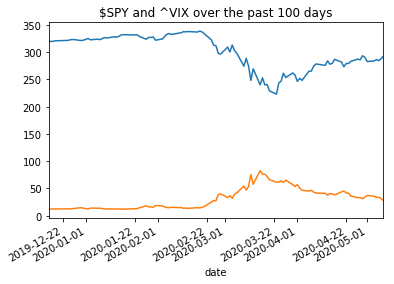

In [11]:
spy_daily.plot()
vix_daily.plot()
plt.title("$SPY and ^VIX over the past 100 days")

Now, let's apply the Haar Wavelet Transform to these two time series. Following is a graph of each detail vector. We are not really interested in the trend vector, because we are investigating the volatility of the time series, not the overall trend. Also, there is a massive scale difference between these two time series (what I mean by this is that one is trading at around 275 dollars and the other is hovering around 25), so it does not make a great deal of sense to compare these two in that sense.

In [12]:
_, detailvecSPY = HaarWaveletTransform(spy_daily)
_, detailvecVIX = HaarWaveletTransform(vix_daily)

Now, let's plot these two on top of each other. I am including a horizontal line for the zero-line.

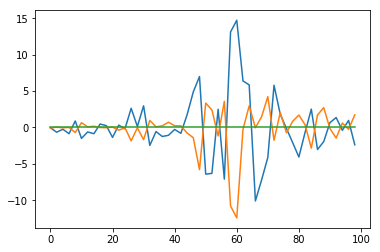

In [17]:
m = list(range(int(len(spy_daily)/2)))
X = [2*i for i in list(m)]
plt.plot(X, detailvecSPY)
plt.plot(X, detailvecVIX)
plt.plot(X, np.zeros(len(detailvecSPY)))

Now, when I see this graph, the first thing I see is a vibration on a string at two times, half a period apart. So, in a perfect scenario, I imagine the detail of SPY to have exactly negative of the detail of VIX. This next cell will be investigating that.

The way that we will be doing that is to measure the cumulative sum of the two time series. In theory, this should equate to 0 at all times. The plot of that is shown after.

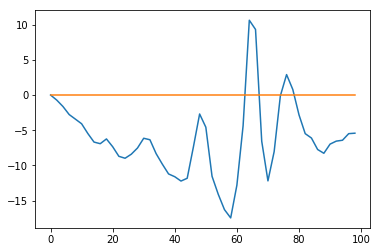

In [20]:
diff_list = [x1 + x2 for (x1, x2) in zip(detailvecSPY, detailvecVIX)]
diff_int = integrate.cumtrapz(diff_list, X, initial=0)
plt.plot(X, diff_int)
plt.plot(X, np.zeros(len(detailvecSPY)))

As you can see from the graph above, considering that these two financial instruments are operating at massively different scales, their detail vectors are very closely related (especially accounting for the volatility that COVID-19 has induced on the market).